# Caltech-256 이미지 데이터셋 분류하기
## 머신러닝 2조 3 윤현종, 박우승, 송혜근
### 진행 모델 : EfficientNetV2M

## 0. Import

In [2]:
import os
import glob
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder

## 1. 필요 데이터셋 준비

In [ ]:
!wget https://caltech256-bucket.s3.amazonaws.com/256_ObjectCategories.tar
!tar -xf 256_ObjectCategories.tar

'wget'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [3]:
dataset_path = './256_ObjectCategories'
augumentation = './alter_image'
all_images = glob.glob(f'{dataset_path}/*/*.jpg')
all_labels = [os.path.basename(os.path.dirname(img)) for img in all_images]
train_images, test_images, train_labels, test_labels = train_test_split(all_images, all_labels, test_size=0.167, random_state=50, stratify=all_labels)

print((train_images))

['./256_ObjectCategories\\236.unicorn\\236_0050.jpg', './256_ObjectCategories\\232.t-shirt\\232_0055.jpg', './256_ObjectCategories\\251.airplanes-101\\251_0749.jpg', './256_ObjectCategories\\169.radio-telescope\\169_0006.jpg', './256_ObjectCategories\\014.blimp\\014_0007.jpg', './256_ObjectCategories\\210.syringe\\210_0102.jpg', './256_ObjectCategories\\054.diamond-ring\\054_0012.jpg', './256_ObjectCategories\\144.minotaur\\144_0006.jpg', './256_ObjectCategories\\251.airplanes-101\\251_0379.jpg', './256_ObjectCategories\\012.binoculars\\012_0193.jpg', './256_ObjectCategories\\029.cannon\\029_0046.jpg', './256_ObjectCategories\\003.backpack\\003_0001.jpg', './256_ObjectCategories\\203.stirrups\\203_0072.jpg', './256_ObjectCategories\\098.harp\\098_0048.jpg', './256_ObjectCategories\\125.knife\\125_0034.jpg', './256_ObjectCategories\\205.superman\\205_0034.jpg', './256_ObjectCategories\\169.radio-telescope\\169_0089.jpg', './256_ObjectCategories\\188.smokestack\\188_0039.jpg', './256_Obj

In [33]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img

# 대비 조절 함수
def adjust_contrast(image, contrast_factor):
    mean = np.mean(image, axis=(0, 1, 2), keepdims=True)
    return np.clip((image - mean) * contrast_factor + mean, 0, 255)

datagen = ImageDataGenerator(
    rotation_range=45,         # 회전 각도 범위 (0-45도)
    width_shift_range=0.1,     # 가로 이동 범위 (10%)
    height_shift_range=0.1,    # 세로 이동 범위 (10%)
    shear_range=0.2,           # 기울임 범위    (20%)
    zoom_range=0.1,            # 확대/축소 범위 (10%)
    horizontal_flip=True,      # 수평 반전  
    fill_mode='nearest',       # 빈 공간을 채우는 방식
    brightness_range=[0.7, 1.4], # 밝기 조절 범위 
    preprocessing_function=lambda img: adjust_contrast(img, contrast_factor=1.5)
)

# 샘플 이미지 로드
j = 0
for img_path in train_images :
  j += 1
  print(j,"/",len(train_images))
  dir_name = os.path.basename(os.path.dirname(img_path))
  img_load = load_img(img_path)    
  x = img_to_array(img_load)        
  x = x.reshape((1,) + x.shape)     # (1, width, height, 3) 형태로 변환

  os.makedirs(f'{augumentation}/{dir_name}', exist_ok=True)

  # 이미지 증강 및 저장
  i = 0
  for batch in datagen.flow(x, batch_size=1, save_to_dir=f'{augumentation}/{dir_name}', save_prefix='aug', save_format='jpg'):
      i += 1
      print(f"Saving {dir_name}, {img_path}, aug, {i}")
      if i > 1:  # 증강된 이미지를 생성
          break


1 / 25495
Saving 236.unicorn, ./256_ObjectCategories\236.unicorn\236_0050.jpg, aug, 1
Saving 236.unicorn, ./256_ObjectCategories\236.unicorn\236_0050.jpg, aug, 2
2 / 25495
Saving 232.t-shirt, ./256_ObjectCategories\232.t-shirt\232_0055.jpg, aug, 1
Saving 232.t-shirt, ./256_ObjectCategories\232.t-shirt\232_0055.jpg, aug, 2
3 / 25495
Saving 251.airplanes-101, ./256_ObjectCategories\251.airplanes-101\251_0749.jpg, aug, 1
Saving 251.airplanes-101, ./256_ObjectCategories\251.airplanes-101\251_0749.jpg, aug, 2
4 / 25495
Saving 169.radio-telescope, ./256_ObjectCategories\169.radio-telescope\169_0006.jpg, aug, 1
Saving 169.radio-telescope, ./256_ObjectCategories\169.radio-telescope\169_0006.jpg, aug, 2
5 / 25495
Saving 014.blimp, ./256_ObjectCategories\014.blimp\014_0007.jpg, aug, 1
Saving 014.blimp, ./256_ObjectCategories\014.blimp\014_0007.jpg, aug, 2
6 / 25495
Saving 210.syringe, ./256_ObjectCategories\210.syringe\210_0102.jpg, aug, 1
Saving 210.syringe, ./256_ObjectCategories\210.syringe\2

In [4]:
altered_image = glob.glob(f'{augumentation}/*/*.jpg')
altered_label = [os.path.basename(os.path.dirname(img)) for img in altered_image]

print(len(altered_image))

print(len(train_images))

print(type(train_images))

full_image = train_images + altered_image
full_label = train_labels + altered_label

import random
c = list(zip(full_image, full_label))
random.shuffle(c)
full_image, full_label=zip(*c)


print(len(full_image))

for i in range(5) :
    print(full_image[i], full_label[i])

50261
25495
<class 'list'>
75756
./256_ObjectCategories\112.human-skeleton\112_0062.jpg 112.human-skeleton
./alter_image\162.picnic-table\aug_0_3872.jpg 162.picnic-table
./alter_image\189.snail\aug_0_3732.jpg 189.snail
./alter_image\155.paperclip\aug_0_835.jpg 155.paperclip
./alter_image\212.teapot\aug_0_4895.jpg 212.teapot


In [5]:
img_size = 480
batch_size = 128
NUM_CLASSES = 257

## 2. 이미지 전처리

In [6]:
def train_data_generator(images, labels, batch_size):
    encoder = LabelEncoder()
    encoded_labels = encoder.fit_transform(labels)
    num_classes = len(encoder.classes_)

    while True:
        idx = np.random.permutation(len(images))
        for i in range(0, len(images), batch_size):
            batch_idx = idx[i:i+batch_size]
            batch_images = [tf.keras.preprocessing.image.load_img(img, target_size=(img_size, img_size)) for img in np.array(images)[batch_idx]]

            batch_x = np.array([tf.keras.preprocessing.image.img_to_array(img) for img in batch_images])
            batch_y = tf.keras.utils.to_categorical(encoded_labels[batch_idx], num_classes)
            yield batch_x, batch_y

In [7]:
def test_data_generator(images, labels, batch_size):
    encoder = LabelEncoder()
    encoded_labels = encoder.fit_transform(labels)
    num_classes = len(encoder.classes_)

    while True:
        idx = np.arange(len(images))
        for i in range(0, len(images), batch_size):
            batch_idx = idx[i:i+batch_size]
            batch_images = [tf.keras.preprocessing.image.load_img(img, target_size=(img_size, img_size)) for img in np.array(images)[batch_idx]]
            batch_x = np.array([tf.keras.preprocessing.image.img_to_array(img) for img in batch_images])
            batch_y = tf.keras.utils.to_categorical(encoded_labels[batch_idx], num_classes)

            yield batch_x, batch_y

In [8]:
train_generator = train_data_generator(full_image, full_label, batch_size)
test_generator = test_data_generator(test_images, test_labels, batch_size)

### 이미지 출력해보기

(128, 480, 480, 3) (480, 480, 3)
(128, 480, 480, 3) (480, 480, 3)
(128, 480, 480, 3) (480, 480, 3)
(128, 480, 480, 3) (480, 480, 3)
(128, 480, 480, 3) (480, 480, 3)
(128, 480, 480, 3) (480, 480, 3)
(128, 480, 480, 3) (480, 480, 3)
(128, 480, 480, 3) (480, 480, 3)
(128, 480, 480, 3) (480, 480, 3)


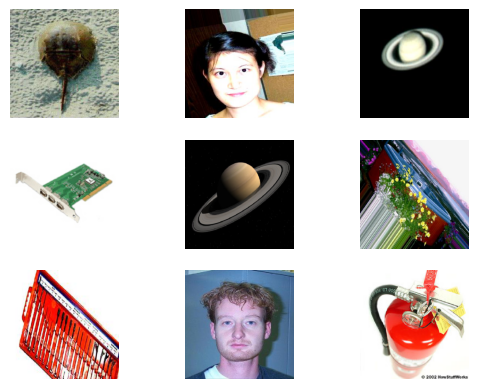

In [ ]:
for i, (image) in enumerate(train_generator):
    if i >= 9 :
        break
    ax = plt.subplot(3, 3, i + 1)
    print(np.shape(image[0]), np.shape(image[0][i]))
    temp = image[0][i] / 255.0
    plt.imshow(temp)
    plt.axis("off")
plt.show()

In [9]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

## 3. 모델 학습

### 학습률을 위한 과정
1. 전이학습
2. 파인튜닝
3. Early Stopping
4. 가중치 제한
5. Nadam 옵티마이저
6. 라벨 스무딩
7. Random Data Augumentation

##### 시도했으나 최종적으로 사용하지 않음
1. Cosine Decay Restarts (사용 X)
2. SAM, ASAM
3. Pytorch 버전

In [10]:
from tensorflow.keras import regularizers
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.applications import EfficientNetV2S, EfficientNetV2M, EfficientNetV2L
from tensorflow.keras.callbacks import ReduceLROnPlateau

### 전이학습용 모델 (Epoch 1 ~ 10)

In [25]:
def build_model(num_classes):
    inputs = layers.Input(shape=(img_size, img_size, 3))
    shape = (img_size, img_size, 3)

    model = EfficientNetV2M(include_top=False, input_tensor=inputs, weights="imagenet")
    model.trainable = False

    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)
    
    top_dropout_rate = 0.4
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    x = layers.Activation('ReLU')(x)
    outputs = layers.Dense(num_classes, activation="softmax", name="pred", #softmax
                           kernel_regularizer=regularizers.l2(0.001),
                           activity_regularizer=regularizers.l1(0.001),
                           kernel_constraint=MaxNorm(2.))(x)

    initial_lr = 1e-3
    lr_decayed_fn = (tf.keras.experimental.CosineDecayRestarts(initial_learning_rate=initial_lr, first_decay_steps=10))

    model = keras.Model(inputs, outputs, name="EfficientNet")
    base_optimizer = tf.keras.optimizers.Nadam(learning_rate=initial_lr)
    loss_fn = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1)
    model.compile(
        optimizer=base_optimizer, loss=loss_fn, metrics=["accuracy"]
    )

    return model

### 파인튜닝용 후반 모델 수정 (Epoch 11 ~ 40)

In [29]:
def unfreeze_model(model):
    for layer in model.layers[-15:]:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True

    first_decay_steps = 500
    initial_lr = 1e-3

    lr_decayed_fn = (tf.keras.experimental.CosineDecayRestarts(initial_learning_rate=initial_lr, 
                                                               first_decay_steps=60,
                                                               m_mul=0.5, alpha=0))

    base_optimizer = tf.keras.optimizers.Nadam(learning_rate=initial_lr)
    loss_fn = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1)

    model.compile(
        optimizer=base_optimizer, loss=loss_fn, metrics=["accuracy"]
    )

### 모델 학습 및 진행

In [30]:
model = build_model(num_classes=NUM_CLASSES)

epochs = 4


steps_per_epoch = len(full_image) // batch_size
validation_steps = len(test_images) // batch_size

from keras.callbacks import EarlyStopping
ES = EarlyStopping(monitor = 'val_accuracy', min_delta = 0, patience = 8, mode = 'auto', restore_best_weights=True)

hist1 = model.fit(train_generator, epochs=epochs,
                 validation_data=test_generator, steps_per_epoch=steps_per_epoch,
                 validation_steps=validation_steps, verbose=1)

unfreeze_model(model)
epochs = 50
hist2 = model.fit(train_generator, epochs=epochs, callbacks=[ES],
                 validation_data=test_generator, steps_per_epoch=steps_per_epoch,
                 validation_steps=validation_steps, verbose=1)

Epoch 1/4
591/591 [==============================] - 826s 1s/step - loss: 2.4410 - accuracy: 0.7459 - val_loss: 1.7636 - val_accuracy: 0.8786
Epoch 2/4
591/591 [==============================] - 814s 1s/step - loss: 1.7865 - accuracy: 0.8579 - val_loss: 1.6317 - val_accuracy: 0.8870
Epoch 3/4
591/591 [==============================] - 814s 1s/step - loss: 1.6734 - accuracy: 0.8750 - val_loss: 1.6004 - val_accuracy: 0.8898
Epoch 4/4
591/591 [==============================] - 813s 1s/step - loss: 1.6368 - accuracy: 0.8809 - val_loss: 1.5820 - val_accuracy: 0.8880
Epoch 1/50
591/591 [==============================] - 836s 1s/step - loss: 1.5742 - accuracy: 0.8938 - val_loss: 1.4650 - val_accuracy: 0.9053
Epoch 2/50
591/591 [==============================] - 826s 1s/step - loss: 1.3999 - accuracy: 0.9343 - val_loss: 1.4165 - val_accuracy: 0.9087
Epoch 3/50
591/591 [==============================] - 825s 1s/step - loss: 1.3211 - accuracy: 0.9519 - val_loss: 1.3906 - val_accuracy: 0.9123
Epo

### 모델 학습 진행 시각화

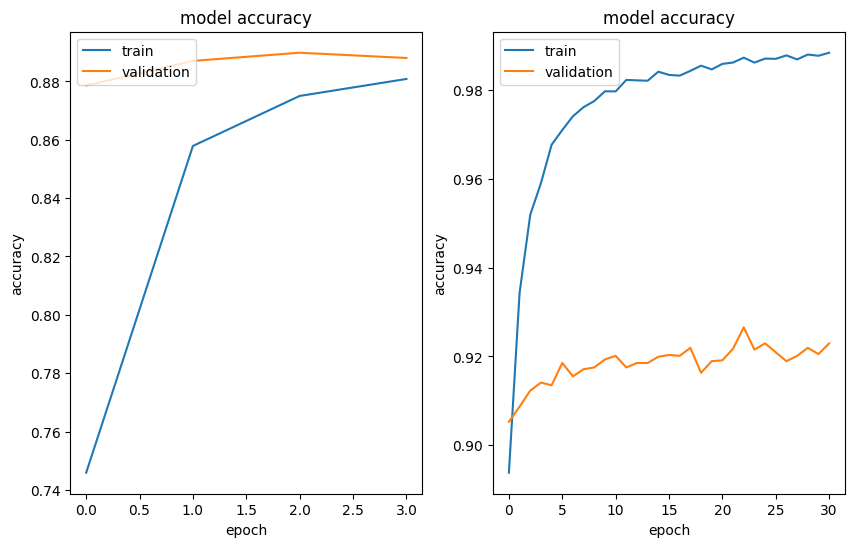

In [32]:
plt.figure(figsize =(10,6))

plt.subplot(1,2,1)
plt.plot(hist1.history["accuracy"])
plt.plot(hist1.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")

plt.subplot(1,2,2)
plt.plot(hist2.history["accuracy"])
plt.plot(hist2.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

### 정확도 측정

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=validation_steps)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

39/39 [==============================] - 50s 1s/step - loss: 1.3274 - accuracy: 0.9266
Test loss: 1.3274
Test accuracy: 0.9266
